In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

**Loading Data**

In [31]:
mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
print(len(X_train))
print(len(X_test))

60000
10000


In [33]:
np.set_printoptions(linewidth=200)

<IPython.core.display.Javascript object>

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

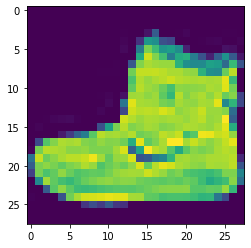

In [34]:
print(y_train[0])
print(X_train[0])
plt.imshow(X_train[0])

**While training, it's easier if we normalise all values**

In [39]:
X_train = X_train/255.0
X_test = X_test/255.0

**Model**

In [40]:
model = keras.Sequential([keras.layers.Flatten(),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

In [41]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training**

In [42]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4940 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3770 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3154 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8902


In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 887us/step - loss: 0.3522 - accuracy: 0.8735


[0.35216808319091797, 0.8734999895095825]

> **87% accuracy**

In [19]:
classifications = model.predict(X_test)

In [20]:
classifications[0]  # probabilities that this item is each of the 10 classes

array([1.0228553e-05, 2.5898521e-07, 1.1244754e-06, 2.4888936e-07, 9.7550776e-07, 3.1905668e-03, 9.2833916e-06, 8.2749218e-02, 1.9419196e-05, 9.1401863e-01], dtype=float32)

In [29]:
classifications[0].sum()

0.99999994

In [28]:
np.where(classifications[0] == max(classifications[0]))

<IPython.core.display.Javascript object>

(array([9], dtype=int64),)

In [26]:
y_test[0]

9

> - **By adding more Neurons (eg- 1024 neurons instead of 128 in the hidden layer) we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', we can hit the law of diminishing returns very quickly!**

> - **On adding another layer between the one with 512 and the final layer with 10, there isn't a significant impact because this is relatively simple data. For far more complex data, extra layers are often necessary.**

> - **On taking 15 epochs, we get a model with a much better loss than the one with 5 but if we take 30 epochs we see the loss value stops decreasing, and sometimes increases, due to Overfitting.**

> - **If we don't normalized the data before training, Accuracy after training decreases.**